In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets

from plotnine import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

from itertools import cycle
from scipy import interp

## Dataset

In [2]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
X = pd.DataFrame(iris.data[:, 2:], columns=['length','width'])  # we only take the first two features.
y = pd.DataFrame(iris.target, columns=['class'])

In [4]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
X_y_df = pd.concat([X, y], axis=1, sort=False)
X_y_df

,length,width,class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


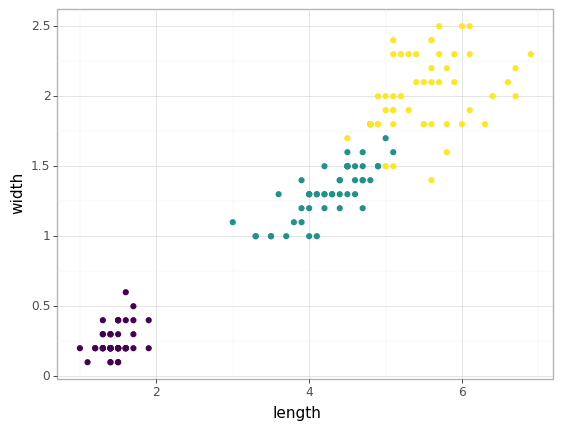

<ggplot: (104231086364)>

In [6]:
(ggplot(X_y_df,aes('length','width'))
 + geom_point(aes(color='class'), show_legend=False)
 + theme_light()
)

In [7]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#### One Hot Encoding

In [8]:
from sklearn import preprocessing
y = preprocessing.label_binarize(y, classes=[0, 1, 2])

In [9]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

## Logistic Regression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (100, 2) y: (100, 3)
TESTE:
X: (50, 2) y: (50, 3)


In [12]:
model = Pipeline([('nor', MinMaxScaler()), ('LR', OneVsRestClassifier(LogisticRegression(multi_class='ovr')))])
params = {}

In [13]:
gs = GridSearchCV(model, params, cv=5, refit=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('nor', MinMaxScaler()),
                                       ('LR',
                                        OneVsRestClassifier(estimator=LogisticRegression(multi_class='ovr')))]),
             param_grid={})

In [14]:
gs.cv_results_

{'mean_fit_time': array([0.02515669]),
 'std_fit_time': array([0.01049971]),
 'mean_score_time': array([0.00806837]),
 'std_score_time': array([0.01334229]),
 'params': [{}],
 'split0_test_score': array([0.65]),
 'split1_test_score': array([0.65]),
 'split2_test_score': array([0.65]),
 'split3_test_score': array([0.5]),
 'split4_test_score': array([0.65]),
 'mean_test_score': array([0.62]),
 'std_test_score': array([0.06]),
 'rank_test_score': array([1])}

In [15]:
y_pred = gs.predict(X_test)

In [16]:
print("Accuracy")
print(accuracy_score(y_test, y_pred))
print("confusion matrix")
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

Accuracy
0.68
confusion matrix


array([[19,  0,  0],
       [15,  0,  0],
       [ 1,  0, 15]], dtype=int64)